The aim is to classify wines based on their properties using PCA (Principal Component Analysis) in order to reduce the number of features (dimensionality reduction) and KMeans in order to cluster the data.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("wine-clustering.csv")

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
round(data.describe(),1)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0
mean,13.0,2.3,2.4,19.5,99.7,2.3,2.0,0.4,1.6,5.1,1.0,2.6,746.9
std,0.8,1.1,0.3,3.3,14.3,0.6,1.0,0.1,0.6,2.3,0.2,0.7,314.9
min,11.0,0.7,1.4,10.6,70.0,1.0,0.3,0.1,0.4,1.3,0.5,1.3,278.0
25%,12.4,1.6,2.2,17.2,88.0,1.7,1.2,0.3,1.2,3.2,0.8,1.9,500.5
50%,13.0,1.9,2.4,19.5,98.0,2.4,2.1,0.3,1.6,4.7,1.0,2.8,673.5
75%,13.7,3.1,2.6,21.5,107.0,2.8,2.9,0.4,2.0,6.2,1.1,3.2,985.0
max,14.8,5.8,3.2,30.0,162.0,3.9,5.1,0.7,3.6,13.0,1.7,4.0,1680.0


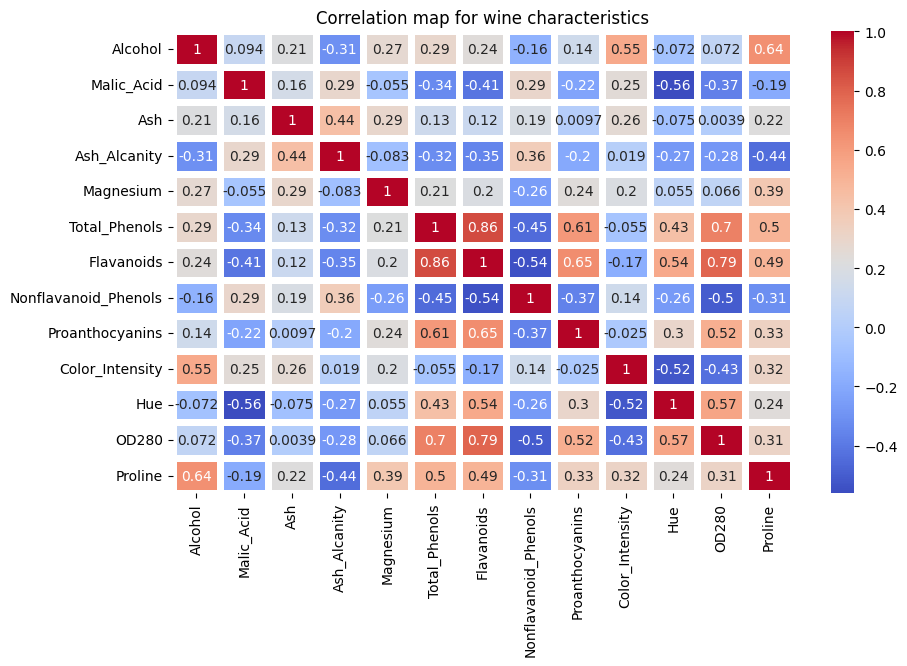

In [6]:
fig,ax = plt.subplots(figsize = (10,6))
ax = sns.heatmap(data.corr(), cmap = "coolwarm", annot = True, linewidths = 5)
plt.title("Correlation map for wine characteristics");

In [7]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data))

In [8]:
pca = PCA()
pca.fit(scaled_df)

PCA()

In [9]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

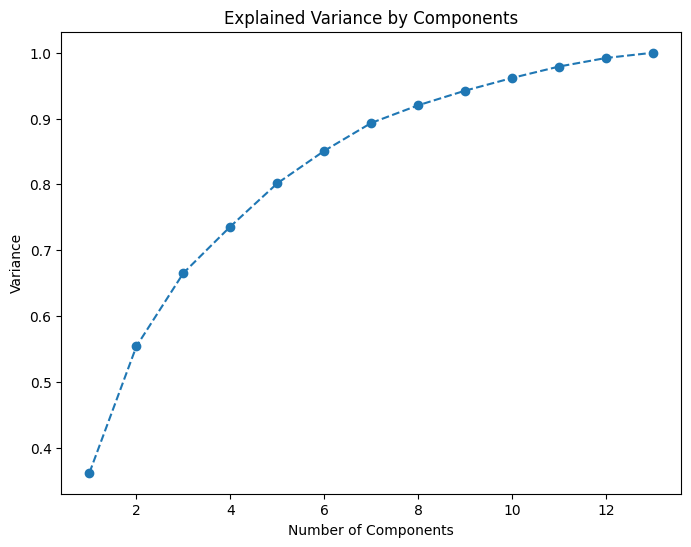

In [10]:
plt.figure(figsize = (8,6));
plt.plot(range(1,14), pca.explained_variance_ratio_.cumsum(), marker = "o", linestyle = "--")
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Variance");

The optimal number of components is 5, since the cumulative variance there is 80%.

In [11]:
pca = PCA(n_components = 5)

In [12]:
pca.fit(scaled_df)

PCA(n_components=5)

In [13]:
scores_pca = pca.transform(scaled_df)

In [14]:
wcss = []
for i in range(1,15):
    kmeans_pca = KMeans(n_clusters = i, random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

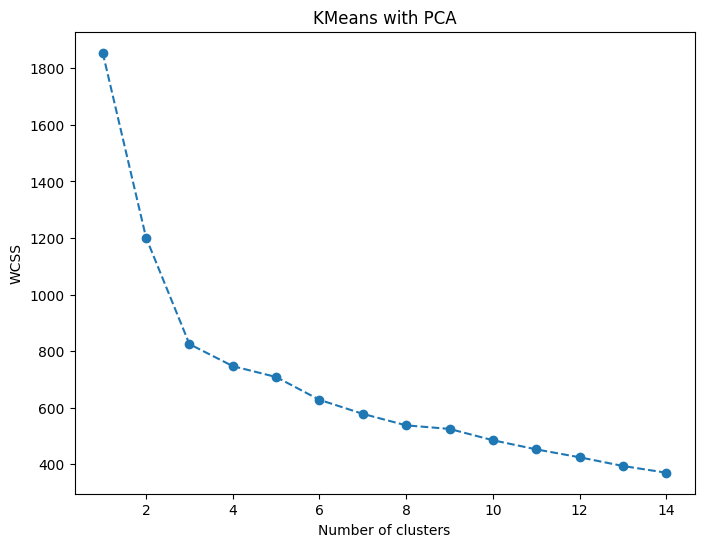

In [15]:
plt.figure(figsize = (8,6));
plt.plot(range(1,15), wcss, marker = "o", linestyle = "--")
plt.title("KMeans with PCA")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS");

The turning point in the graph comes at 3 clusters, so 3 is the optimal number.

In [16]:
kmeans_pca = KMeans(n_clusters = 3, random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=42)

In [17]:
df_data_kmeans_pca = pd.concat([data.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_data_kmeans_pca.columns.values[-5:] = ["Component 1", "Component 2", "Component 3", "Component 4", "Component 5"]
df_data_kmeans_pca["K-means PCA"] = kmeans_pca.labels_

In [18]:
df_data_kmeans_pca.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Component 1,Component 2,Component 3,Component 4,Component 5,K-means PCA
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3.316751,-1.443463,-0.165739,-0.215631,0.693043,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2.209465,0.333393,-2.026457,-0.291358,-0.257655,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2.516740,-1.031151,0.982819,0.724902,-0.251033,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3.757066,-2.756372,-0.176192,0.567983,-0.311842,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1.008908,-0.869831,2.026688,-0.409766,0.298458,2


In [19]:
df_data_kmeans_pca["Clusters"] = df_data_kmeans_pca["K-means PCA"].map({0 : "first",
                                                                        1 : "second",
                                                                        2 : "third"})

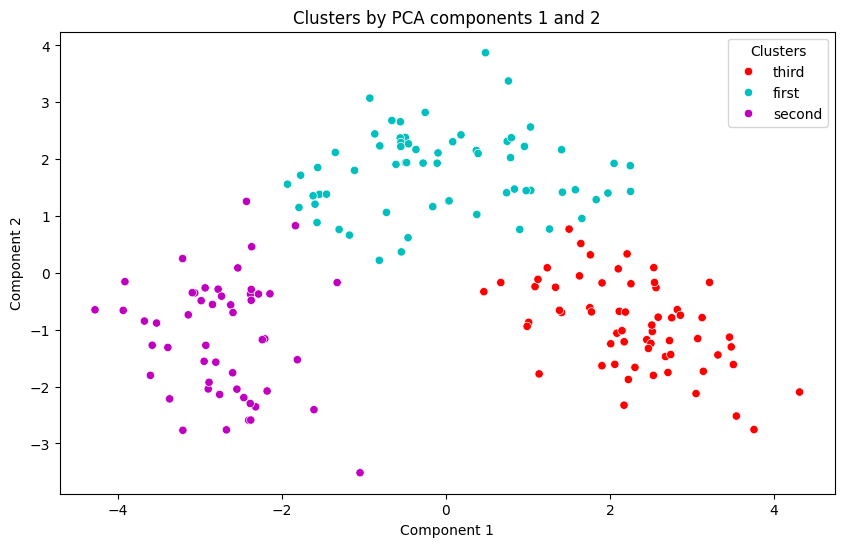

In [20]:
x = df_data_kmeans_pca["Component 1"]
y = df_data_kmeans_pca["Component 2"]
plt.figure(figsize = (10,6));
sns.scatterplot(x = "Component 1", y = "Component 2", hue = "Clusters", data = df_data_kmeans_pca, palette = ['r', 'c', 'm'])
plt.title("Clusters by PCA components 1 and 2")
plt.show()